In [1]:
import numpy as np
import pandas as pd
import torchvision
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib inline

# Если ищешь лоссы, то ищи в колабе

In [2]:
def dk(self, X):
    x1, y1, z1, x2, y2, z2 = X
    return [y1 + b*x1**2 - a*x1**3 -z1 + I - k1*(x1-vs)*G(x2),
            c - d*x1**2 - y1,
            r*(s*(x1 - xr) - z1),
            y2 + b*x2**2 - a*x2**3 -z2 + I - k2*(x2-vs)*G(x1),
            c - d*x2**2 - y2,
            r*(s*(x2 - xr) - z2)        
    ]
 
def G(x):
    return 1/(1+np.exp(-lam*(x-teta)))

In [3]:
a = 1
b = 3
c = 1
d = 5
xr = -1.6
r = 0.01
s = 5
I = 4
vs = 2
lam = 10
teta = -0.25
k1 = -0.17
k2 = -0.17

In [4]:
sol = solve_ivp(dk, [0, 250200], [-0.1, 0.1, -0.1, -0.1, -0.1, -0.1], 
                t_eval=np.array(range(200, 250200, 1)), rtol = 1e-11, atol = 1e-11, dense_output=True)

In [6]:
sol2 = solve_ivp(dk, [20, 25020], [-0.1, 0.1, -0.1, -0.1, -0.1, -0.1], 
                t_eval=np.array(np.arange(20, 25020, 0.1)), rtol = 1e-11, atol = 1e-11, dense_output=True)

In [12]:
sol3 = solve_ivp(dk, [20, 25020], [-0.1, 0.1, -0.1, -0.1, -0.1, -0.1], 
                t_eval=np.array(np.arange(20, 25020, 0.01)), rtol = 1e-11, atol = 1e-11, dense_output=True)

In [27]:
data2 = sol3.y[0] + sol3.y[3]
mean2 = data2.mean()
std2 = data2.std()
mean2 + 6*std2

2.5176199101233188

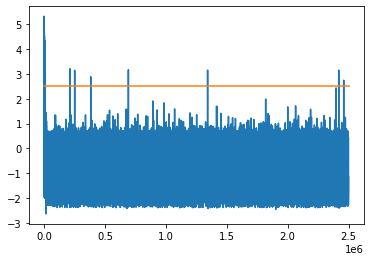

In [30]:
plt.plot(data2)
plt.plot([0, 2500000], [mean2 + 6 * std2] * 2)

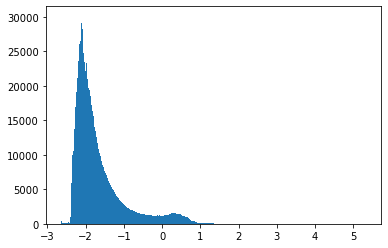

In [33]:
plt.hist(data2, 1000)
plt.show()

In [22]:
data1 = sol2.y[0] + sol2.y[3]
mean1 = data1.mean()
std1 = data1.std()
mean1 + 6*std1

2.5176326054761073

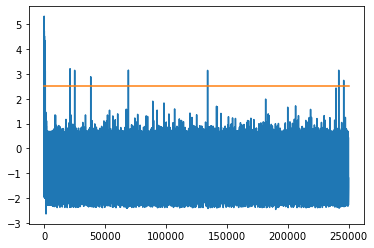

In [26]:
plt.plot(data1)
plt.plot([0, 250000], [mean1 + 6 * std1] * 2)

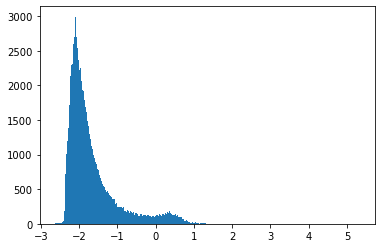

In [34]:
plt.hist(data1, 1000)
plt.show()

In [14]:
data = sol.y[0] + sol.y[3]


In [17]:
mean = data.mean()
std = data.std()
mean + 6*std

2.4338144981112864

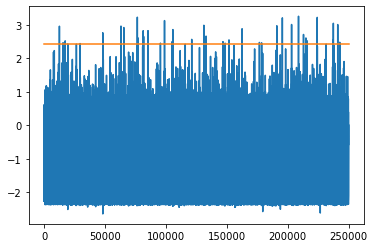

In [21]:
plt.plot(data)
plt.plot([0, 250000], [mean + 6 * std] * 2)

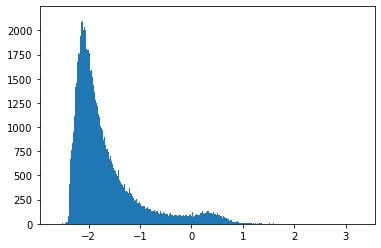

In [35]:
plt.hist(data, 1000)
plt.show()

In [ ]:
#np.save('DK_time_series_for_new_loss', sol.y)

In [2]:
data = np.load("DK_time_series_for_new_loss.npy")
data = data[0] + data[3]

train = data[:10000]
test =  data[10000:]

mean = train.mean()
std = train.std()
#sigmastest = np.abs(test - mean)
train_norm = (train - mean)/std
test_norm = (test - mean)/std

train_norm = torch.FloatTensor(train_norm).view(-1)
test_norm = torch.FloatTensor(test_norm).view(-1)

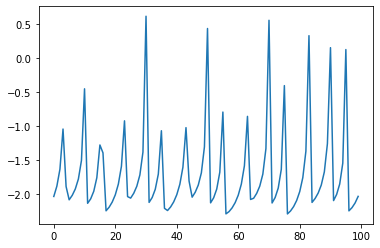

In [3]:
plt.plot(data[100:200])

In [4]:
mean + 6*std

2.3719967290340067

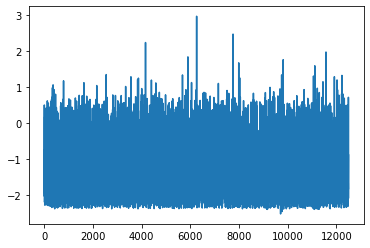

In [ ]:
plt.plot(data)

SyntaxError: invalid syntax (Temp/ipykernel_9248/3186197947.py, line 1)

In [33]:
bins

array([-2.52023661, -2.51475424, -2.50927187, ...,  2.95117086,
        2.95665323,  2.9621356 ])

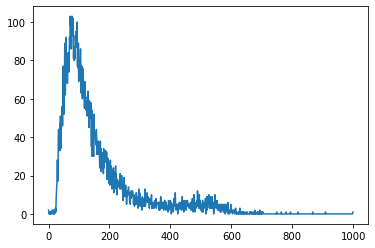

In [30]:
plt.plot(hist)

C:\Users\kolya\AppData\Local\Temp/ipykernel_9248/3207956659.py:9: RuntimeWarning: invalid value encountered in log10
  logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))


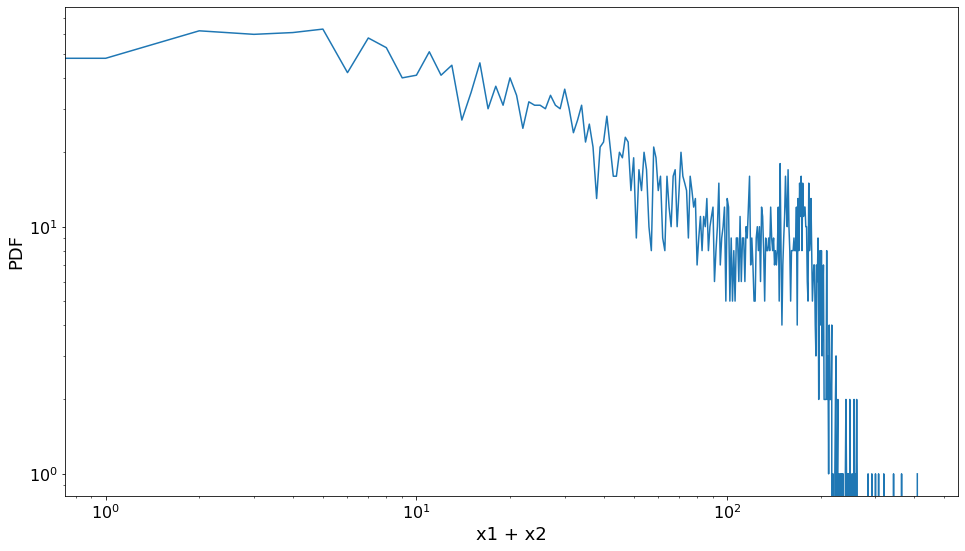

In [62]:
csfont = {'fontsize': 18}
plt.figure(figsize=(16, 9))
plt.tick_params(axis='both', which='major', labelsize=16)

plt.xlabel('x1 + x2', **csfont)
plt.ylabel('PDF', **csfont)
hist, bins = np.histogram(data, bins=500) 
#bins -= bins.min()
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.plot(hist[90:600])
plt.yscale('log')
plt.xscale('log')


C:\Users\kolya\AppData\Local\Temp/ipykernel_11504/3187467385.py:9: RuntimeWarning: invalid value encountered in log10
  logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))


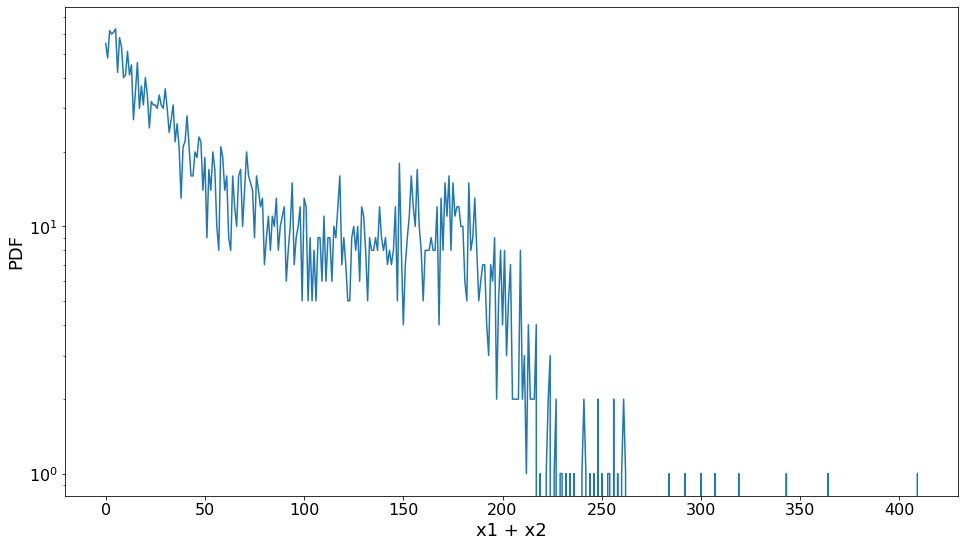

In [3]:
csfont = {'fontsize': 18}
plt.figure(figsize=(16, 9))
plt.tick_params(axis='both', which='major', labelsize=16)

plt.xlabel('x1 + x2', **csfont)
plt.ylabel('PDF', **csfont)
hist, bins = np.histogram(data, bins=500) 
#bins -= bins.min()
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.plot(hist[90:600])
plt.yscale('log')

In [3]:
train_window = 20

def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

train_inout_seq = create_inout_sequences(train_norm, train_window)
test_inout_seq = create_inout_sequences(test_norm, train_window)

In [4]:
from torch.utils.data import DataLoader

In [5]:
train_dataloader = DataLoader(train_inout_seq, batch_size=64, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_inout_seq, batch_size=64, shuffle=True, drop_last=True)

In [6]:
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=32, num_layers=2, output_size=1, dropout=0.2):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.linear_1 = nn.Linear(input_size, hidden_layer_size)
        self.relu = nn.ReLU()
        self.lstm = nn.LSTM(hidden_layer_size, hidden_size=self.hidden_layer_size, num_layers=num_layers, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.linear_2 = nn.Linear(num_layers*hidden_layer_size, output_size)
        

    def forward(self, x):
        batchsize = x.shape[0]

        # layer 1
        x = self.linear_1(x)
        x = self.relu(x)
        
        # LSTM layer
        lstm_out, (h_n, c_n) = self.lstm(x)

        # Floating
        x = h_n.permute(1, 0, 2).reshape(batchsize, -1) 
        
        # layer 2
        x = self.dropout(x)
        predictions = self.linear_2(x)
        return predictions[:,-1]

In [7]:
model = LSTMModel(input_size=1, hidden_layer_size=100, num_layers=2, output_size=1, dropout=0.2)
model = model.to('cuda')

In [8]:
def run_epoch(model, dataloader, is_training=False):
    epoch_loss = 0

    if is_training:
        model.train()
    else:
        model.eval()

    for idx, (x, y) in enumerate(dataloader):
        if is_training:
            optimizer.zero_grad()

        batchsize = x.shape[0]

        x = torch.reshape(x, (64, 20, 1)).to('cuda')
        y = y.view(-1).to('cuda')

        out = model(x)
        loss = criterion(out.contiguous(), y.contiguous())

        if is_training:
            loss.backward()
            optimizer.step()

        epoch_loss += (loss.detach().item() / batchsize)


    return epoch_loss

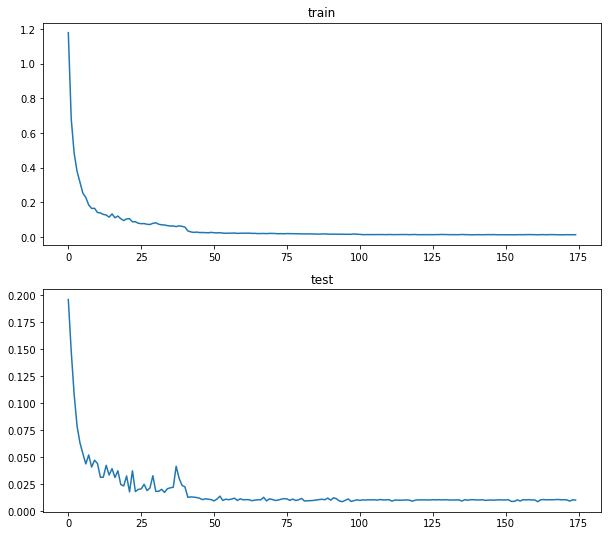

Epoch[175/175] | loss train:0.013993, test:0.010402


In [12]:
# define optimizer and loss function
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.98), eps=1e-9)
lr = 0.001

losses_train = []
losses_test = []
# begin training
for epoch in range(175): 
    if epoch > 40:
        lr = 0.0001
    if epoch > 100:
        lr = 0.00001
    optimizer = optim.Adam(model.parameters(), lr=lr, betas=(0.9, 0.98), eps=1e-9)    
    loss_train = run_epoch(model, train_dataloader, is_training=True)
    loss_val = run_epoch(model, test_dataloader)
    losses_train.append(loss_train)
    losses_test.append(loss_val)
    
    clear_output(True)
    fig = plt.figure(figsize=(10, 9))
    
    ax_1 = fig.add_subplot(2, 1, 1)
    ax_2 = fig.add_subplot(2, 1, 2)
    ax_1.set_title('train')
    ax_1.plot(losses_train)
    ax_2.set_title('test')
    ax_2.plot(losses_test)
    plt.show()
    
    print('Epoch[{}/{}] | loss train:{:.6f}, test:{:.6f}'
              .format(epoch+1, 175, loss_train, loss_val))

In [13]:
torch.save(model.state_dict(), "./DKDeepLSTM")

In [9]:
model.load_state_dict(torch.load("./DKDeepLSTM"))

<All keys matched successfully>

In [10]:
model.eval()
train_dataloader = DataLoader(train_inout_seq, batch_size=64, shuffle=True, drop_last=True)
val_dataloader = DataLoader(test_inout_seq, batch_size=64, shuffle=False, drop_last=True)

rmse = []

for k in range(1, 20):
    test_right_part = (len(test)- 20)%64
    predicted_val = np.array([])
    for idx, (x, y) in enumerate(val_dataloader):
        x = torch.reshape(x, (64, 20, 1)).to('cuda')
        cur_x = x
        for _ in range(k):
            out = model(cur_x.to('cuda'))
            cur_x = torch.hstack((cur_x[:, 1:], torch.reshape(out, (64, 1, 1))))
        predicted_val = np.concatenate((predicted_val, cur_x[:, -1, 0].cpu().detach().numpy()))
    if k == 1:
        r = (((np.array(predicted_val)*std+mean - np.array(test[20:-test_right_part]))**2).mean())**0.5
    else:
        r = (((np.array(predicted_val[:-k+1])*std+mean - np.array(test[20+k-1:-test_right_part]))**2).mean())**0.5
    rmse.append(r)

In [11]:
import matplotlib.ticker as ticker


Text(0.5, 0, 'prediction step')

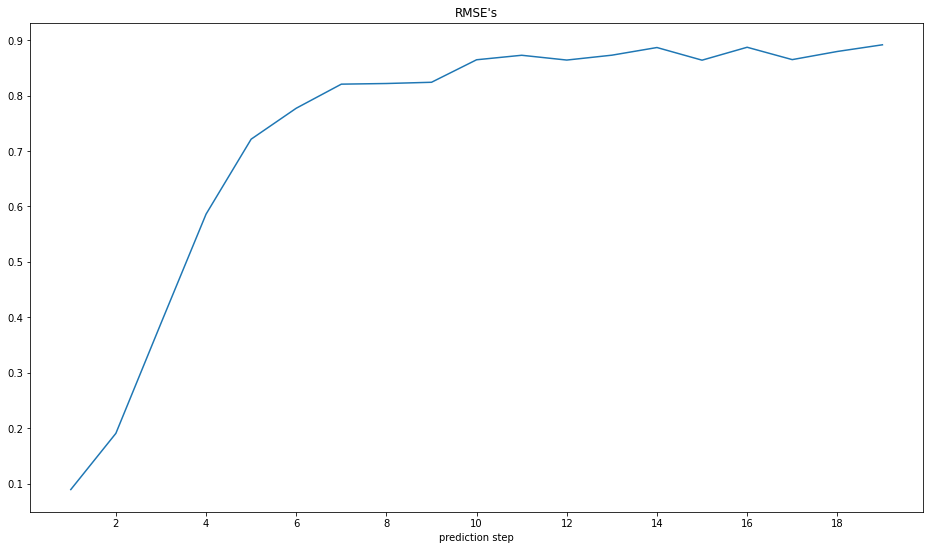

In [18]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.plot(list(range(1, 20)), rmse)
ax.set_title("RMSE's")
ax.set_xlabel("prediction step")

In [ ]:
torch.save(model.state_dict(), "./New_loss_dk")

In [ ]:
model.load_state_dict(torch.load("./New_loss_dk"))

<All keys matched successfully>

In [ ]:
model.eval()
model.to('cpu')
rmse = []
for k in range(1, 21):
    #k = 3
    last_k_step = test_norm[:k].tolist()
    prediction = []
    for seq, label in test_inout_seq:
        loop_steps = seq.tolist()
        #print(len(last_k_step))
        for j in range(k):
            model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                            torch.zeros(1, 1, model.hidden_layer_size))
            y_pred = model(torch.FloatTensor(loop_steps).view(-1))
            loop_steps.append(y_pred.detach()[0].item())
            loop_steps = loop_steps[1:]
            #print(len(loop_steps))
        clear_output(True)
        prediction.append(loop_steps[-1])
        #last_k_step.append(test_norm[i])
        #last_k_step = last_k_step[1:]
    if k == 1:
        r = (((np.array(prediction)*std+mean - np.array(test[20:]))**2).mean())**0.5
    else:
        r = (((np.array(prediction[:-k+1])*std+mean - np.array(test[20+k-1:]))**2).mean())**0.5
    rmse.append(r)

In [ ]:
import matplotlib.ticker as ticker


Text(0.5, 0, 'prediction step')

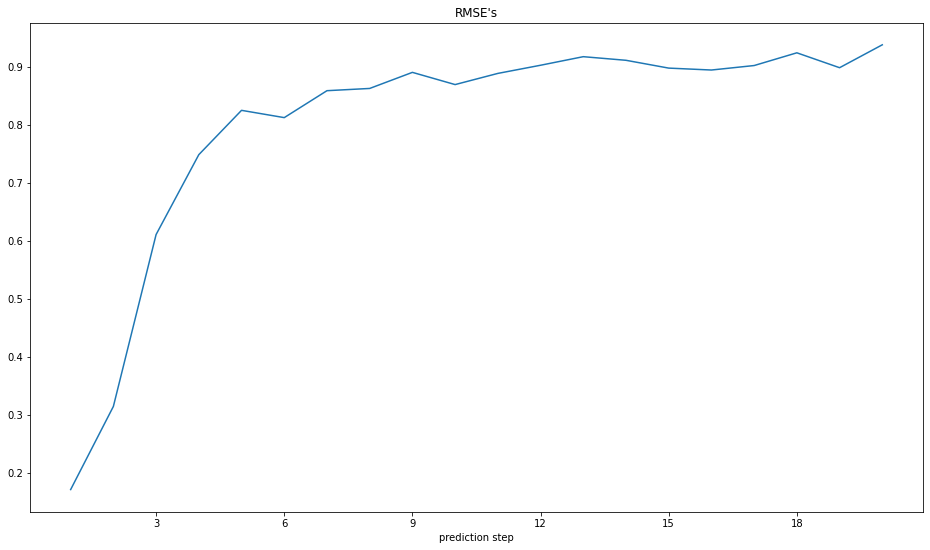

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.plot(list(range(1, 21)), rmse)
ax.set_title("RMSE's")
ax.set_xlabel("prediction step")

In [ ]:
model.eval()
model.to('cpu')
k = 5
last_k_step = test_norm[:k].tolist()
prediction = []
for seq, label in test_inout_seq:
    loop_steps = seq.tolist()
    #print(len(last_k_step))
    for j in range(k):
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        y_pred = model(torch.FloatTensor(loop_steps).view(-1))
        loop_steps.append(y_pred.detach()[0].item())
        loop_steps = loop_steps[1:]
        #print(len(loop_steps))
    clear_output(True)
    prediction.append(loop_steps[-1])
    #last_k_step.append(test_norm[i])
    #last_k_step = last_k_step[1:]

In [ ]:
dif = np.array(prediction[:-k+1]) - np.array(test_norm[20+k-1:])

Text(0.5, 1.0, 'The difference between prediction and test, k = 5')

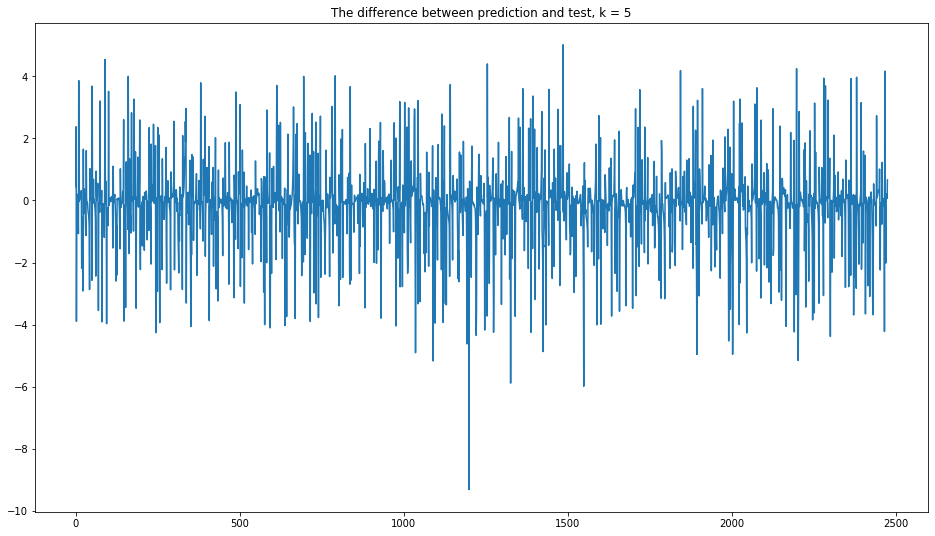

In [ ]:
plt.figure(figsize = (16, 9))
plt.plot(dif)
plt.title("The difference between prediction and test, k = 5")

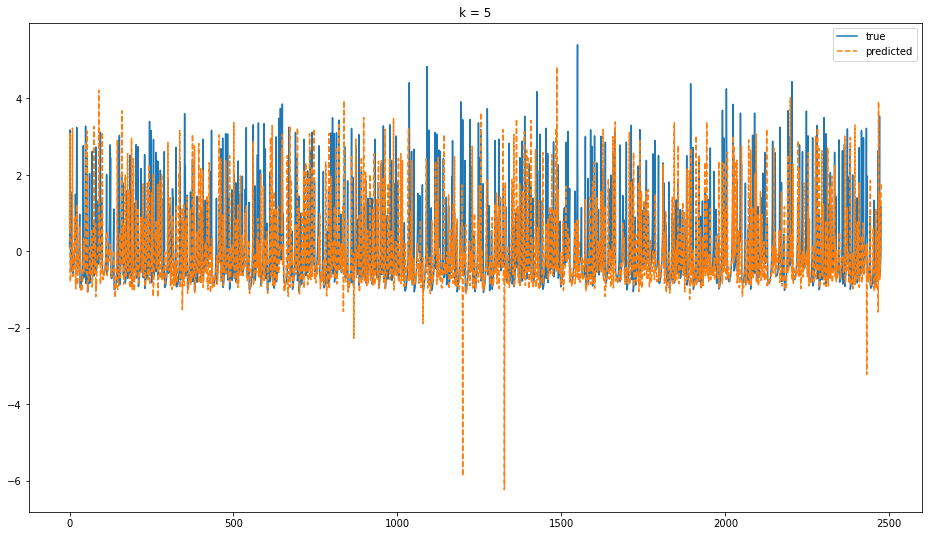

In [ ]:
plt.figure(figsize = (16, 9))
plt.plot(test_norm[20+k-1:], label='true')
plt.plot(prediction[:-k+1],  linestyle = '--', label='predicted')
plt.title("k = 5")
plt.legend()

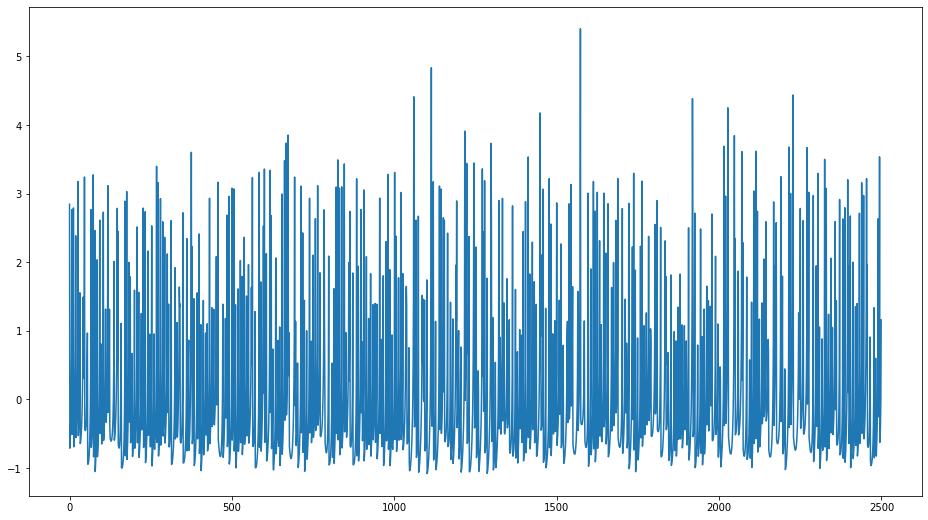

In [ ]:
plt.figure(figsize = (16, 9))
plt.plot(test_norm)

In [ ]:
model.eval()
model.to('cpu')
k = 1
last_k_step = test_norm[:k].tolist()
prediction = []
for seq, label in test_inout_seq:
    loop_steps = seq.tolist()
    #print(len(last_k_step))
    for j in range(k):
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        y_pred = model(torch.FloatTensor(loop_steps).view(-1))
        loop_steps.append(y_pred.detach()[0].item())
        loop_steps = loop_steps[1:]
        #print(len(loop_steps))
    clear_output(True)
    prediction.append(loop_steps[-1])
    #last_k_step.append(test_norm[i])
    #last_k_step = last_k_step[1:]

In [ ]:
dif1 = np.array(prediction) - np.array(test_norm[20:])

Text(0.5, 1.0, 'The difference between prediction and test, k = 1')

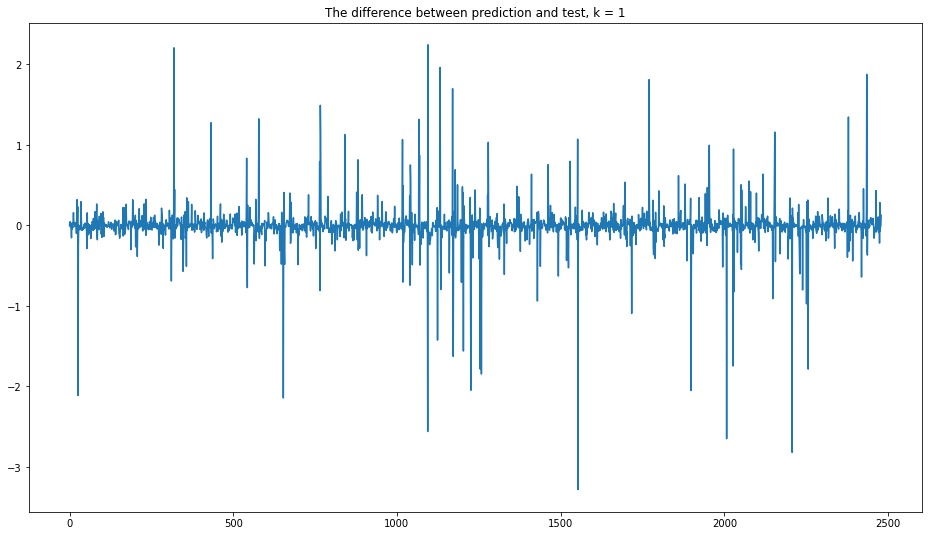

In [ ]:
plt.figure(figsize = (16, 9))
plt.plot(dif1)
plt.title("The difference between prediction and test, k = 1")

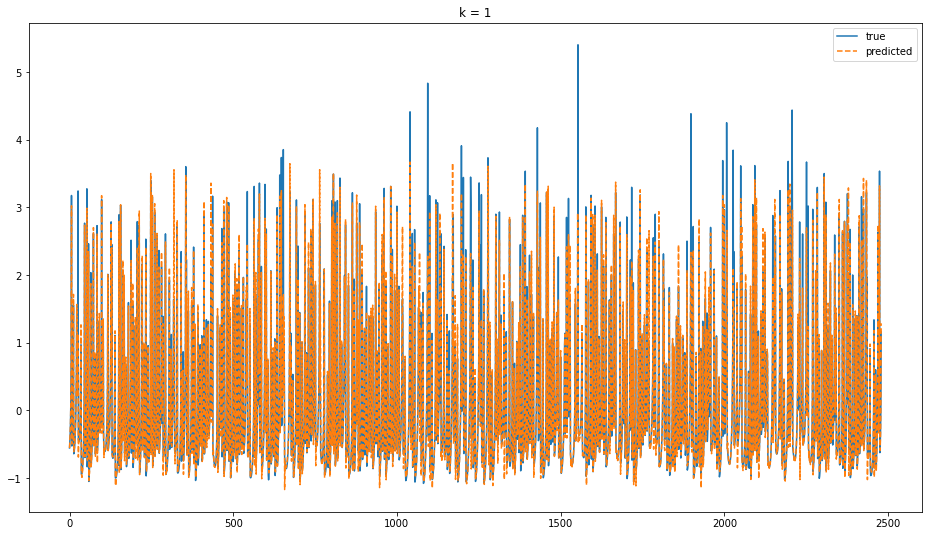

In [ ]:
plt.figure(figsize = (16, 9))
plt.plot(test_norm[20:], label='true')
plt.plot(prediction,  linestyle = '--', label='predicted')
plt.title("k = 1")
plt.legend()

In [ ]:
model.eval()
model.to('cpu')
k = 20
last_k_step = test_norm[:k].tolist()
prediction = []
for seq, label in test_inout_seq:
    loop_steps = seq.tolist()
    #print(len(last_k_step))
    for j in range(k):
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        y_pred = model(torch.FloatTensor(loop_steps).view(-1))
        loop_steps.append(y_pred.detach()[0].item())
        loop_steps = loop_steps[1:]
        #print(len(loop_steps))
    clear_output(True)
    prediction.append(loop_steps[-1])
    #last_k_step.append(test_norm[i])
    #last_k_step = last_k_step[1:]

In [ ]:
dif20 = np.array(prediction[:-k+1]) - np.array(test_norm[20+k-1:])


Text(0.5, 1.0, 'The difference between prediction and test, k = 20')

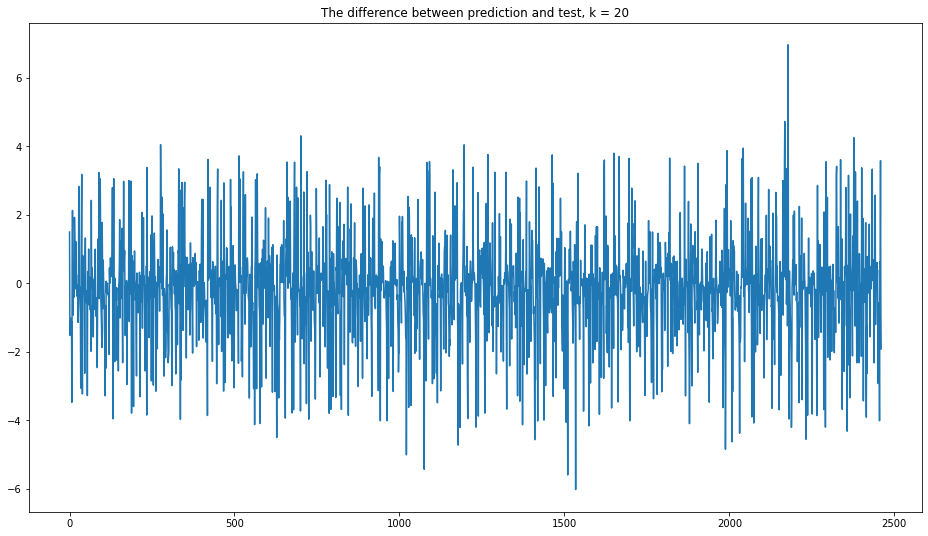

In [ ]:
plt.figure(figsize = (16, 9))
plt.plot(dif20)
plt.title("The difference between prediction and test, k = 20")

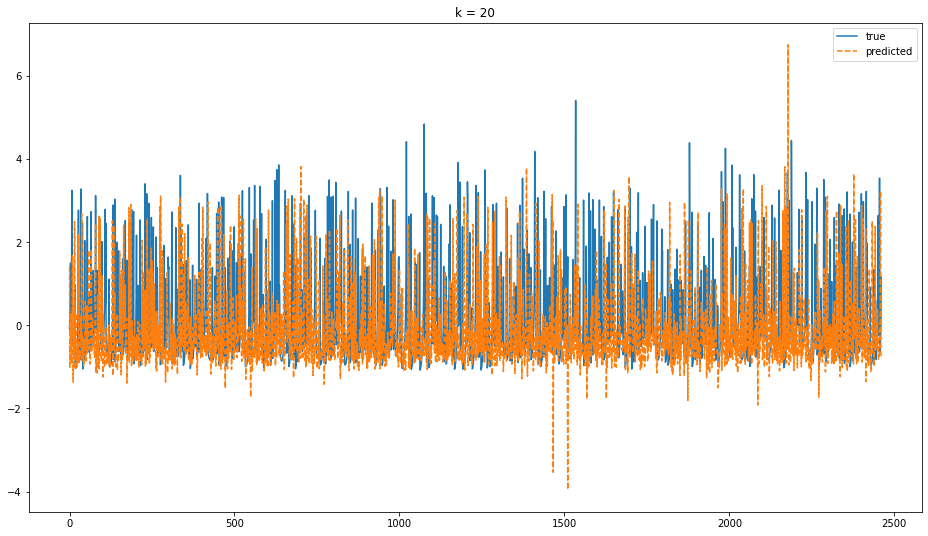

In [ ]:
plt.figure(figsize = (16, 9))
plt.plot(test_norm[20+k-1:], label='true')
plt.plot(prediction[:-k+1],  linestyle = '--', label='predicted')
plt.title("k = 20")
plt.legend()

In [ ]:
(((np.array(prediction)*std+mean - np.array(test[20:]))**2).mean())**0.5

0.17109309345871304

# Some gamma experements

In [ ]:
def run_epoch(train_inout_seq, is_training=False, gamma=1):
    epoch_loss = 0

    if is_training:
        model.train()
    else:
        model.eval()

    for seq, label in train_inout_seq:
        if is_training:
            optimizer.zero_grad()
            
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size).to('cuda'),
                        torch.zeros(1, 1, model.hidden_layer_size).to('cuda'))
        y_pred = model(seq.to('cuda'))

        
        loss = criterion(y_pred, label.to('cuda'), gamma)

        if is_training:
            loss.backward()
            optimizer.step()

        epoch_loss += loss.detach().item() 

    lr = scheduler.get_last_lr()[0]

    return epoch_loss, lr

# gamma = 2

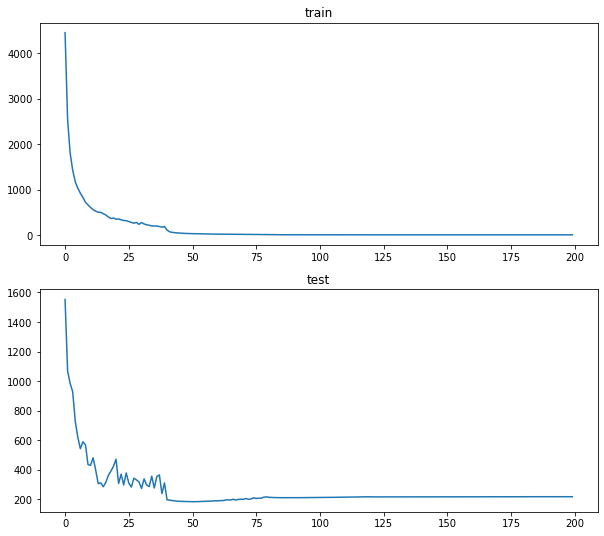

Epoch[200/200] | loss train:3.456254, test:217.319137 | lr:0.000000


In [ ]:
# define optimizer, scheduler and loss function
criterion = gevl_loss
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.98), eps=1e-9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=40, gamma=0.1)

losses_train = []
losses_test = []
# begin training
for epoch in range(200):
    loss_train, lr_train = run_epoch(train_inout_seq, is_training=True)
    loss_val, lr_val = run_epoch(test_inout_seq, gamma=2)
    scheduler.step()
    losses_train.append(loss_train)
    losses_test.append(loss_val)
    
    clear_output(True)
    fig = plt.figure(figsize=(10, 9))
    
    ax_1 = fig.add_subplot(2, 1, 1)
    ax_2 = fig.add_subplot(2, 1, 2)
    ax_1.set_title('train')
    ax_1.plot(losses_train)
    ax_2.set_title('test')
    ax_2.plot(losses_test)
    plt.show()
    
    print('Epoch[{}/{}] | loss train:{:.6f}, test:{:.6f} | lr:{:.6f}'
              .format(epoch+1, 200, loss_train, loss_val, lr_train))

In [ ]:
model.eval()
model.to('cpu')
k = 1
last_k_step = test_norm[:k].tolist()
prediction = []
for seq, label in test_inout_seq:
    loop_steps = seq.tolist()
    #print(len(last_k_step))
    for j in range(k):
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        y_pred = model(torch.FloatTensor(loop_steps).view(-1))
        loop_steps.append(y_pred.detach()[0].item())
        loop_steps = loop_steps[1:]
        #print(len(loop_steps))
    clear_output(True)
    prediction.append(loop_steps[-1])
    #last_k_step.append(test_norm[i])
    #last_k_step = last_k_step[1:]

In [ ]:
(((np.array(prediction)*std+mean - np.array(test[20:]))**2).mean())**0.5

0.1674494645719259

# Frechet loss

In [ ]:
def run_epoch(train_inout_seq, is_training=False):
    epoch_loss = 0

    if is_training:
        model.train()
    else:
        model.eval()

    for seq, label in train_inout_seq:
        if is_training:
            optimizer.zero_grad()
            
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size).to('cuda'),
                        torch.zeros(1, 1, model.hidden_layer_size).to('cuda'))
        y_pred = model(seq.to('cuda'))

        
        loss = criterion(y_pred, label.to('cuda'))

        if is_training:
            loss.backward()
            optimizer.step()

        epoch_loss += loss.detach().item() 

    lr = scheduler.get_last_lr()[0]

    return epoch_loss, lr

In [ ]:

# define optimizer, scheduler and loss function
criterion = gevl_loss
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.98), eps=1e-9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=40, gamma=0.1)

losses_train = []
losses_test = []
# begin training
for epoch in range(200):
    loss_train, lr_train = run_epoch(train_inout_seq, is_training=True)
    loss_val, lr_val = run_epoch(test_inout_seq)
    scheduler.step()
    losses_train.append(loss_train)
    losses_test.append(loss_val)
    
#     clear_output(True)
#     fig = plt.figure(figsize=(10, 9))
    
#     ax_1 = fig.add_subplot(2, 1, 1)
#     ax_2 = fig.add_subplot(2, 1, 2)
#     ax_1.set_title('train')
#     ax_1.plot(losses_train)
#     ax_2.set_title('test')
#     ax_2.plot(losses_test)
#     plt.show()
    
#     print('Epoch[{}/{}] | loss train:{:.6f}, test:{:.6f} | lr:{:.6f}'
#               .format(epoch+1, 200, loss_train, loss_val, lr_train))

tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([nan], device='cuda:0', grad_fn=<SubBackward0>)
tensor([na

KeyboardInterrupt: 

In [ ]:
model = LSTM().to('cuda')

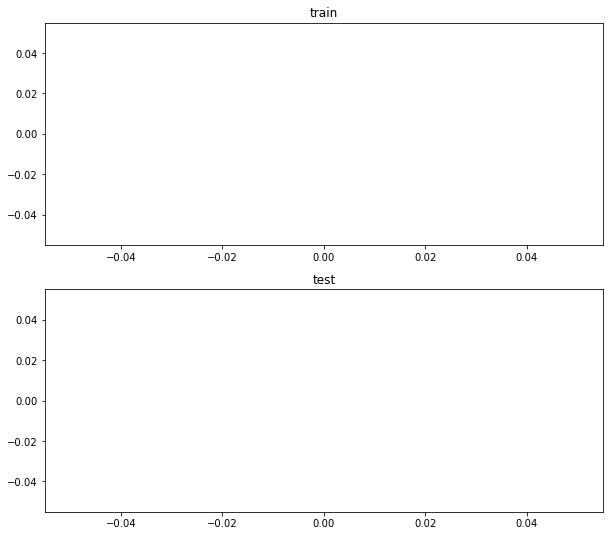

Epoch[1/200] | loss train:nan, test:nan | lr:0.001000


KeyboardInterrupt: 

In [ ]:
# define optimizer, scheduler and loss function
criterion = Frechet_loss
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.98), eps=1e-9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=40, gamma=0.1)

losses_train = []
losses_test = []
# begin training
for epoch in range(200):
    loss_train, lr_train = run_epoch(train_inout_seq, is_training=True)
    loss_val, lr_val = run_epoch(test_inout_seq)
    scheduler.step()
    losses_train.append(loss_train)
    losses_test.append(loss_val)
    
    clear_output(True)
    fig = plt.figure(figsize=(10, 9))
    
    ax_1 = fig.add_subplot(2, 1, 1)
    ax_2 = fig.add_subplot(2, 1, 2)
    ax_1.set_title('train')
    ax_1.plot(losses_train)
    ax_2.set_title('test')
    ax_2.plot(losses_test)
    plt.show()
    
    print('Epoch[{}/{}] | loss train:{:.6f}, test:{:.6f} | lr:{:.6f}'
              .format(epoch+1, 200, loss_train, loss_val, lr_train))

# Старый лосс

In [ ]:
model = LSTM().to('cuda')

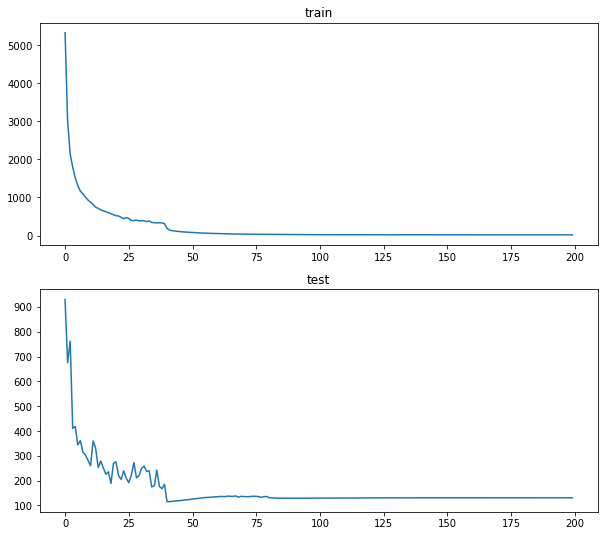

Epoch[200/200] | loss train:20.147353, test:131.007818 | lr:0.000000


In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.98), eps=1e-9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=40, gamma=0.1)

losses_train = []
losses_test = []
# begin training
for epoch in range(200):
    loss_train, lr_train = run_epoch(train_inout_seq, is_training=True)
    loss_val, lr_val = run_epoch(test_inout_seq)
    scheduler.step()
    losses_train.append(loss_train)
    losses_test.append(loss_val)
    
    clear_output(True)
    fig = plt.figure(figsize=(10, 9))
    
    ax_1 = fig.add_subplot(2, 1, 1)
    ax_2 = fig.add_subplot(2, 1, 2)
    ax_1.set_title('train')
    ax_1.plot(losses_train)
    ax_2.set_title('test')
    ax_2.plot(losses_test)
    plt.show()
    
    print('Epoch[{}/{}] | loss train:{:.6f}, test:{:.6f} | lr:{:.6f}'
              .format(epoch+1, 200, loss_train, loss_val, lr_train))

In [ ]:
model.eval()
model.to('cpu')
k = 1
last_k_step = test_norm[:k].tolist()
prediction = []
for seq, label in test_inout_seq:
    loop_steps = seq.tolist()
    #print(len(last_k_step))
    for j in range(k):
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        y_pred = model(torch.FloatTensor(loop_steps).view(-1))
        loop_steps.append(y_pred.detach()[0].item())
        loop_steps = loop_steps[1:]
        #print(len(loop_steps))
    clear_output(True)
    prediction.append(loop_steps[-1])
    #last_k_step.append(test_norm[i])
    #last_k_step = last_k_step[1:]

In [ ]:
(((np.array(prediction)*std+mean - np.array(test[20:]))**2).mean())**0.5

0.1547160136340754

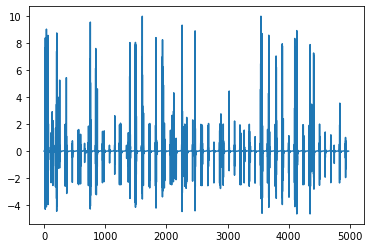

In [ ]:
plt.plot(prediction)

In [ ]:
model.eval()
model.to('cpu')
k = 1
last_k_step = test_norm[:k].tolist()
prediction = []
for seq, label in test_inout_seq:
    loop_steps = seq.tolist()
    #print(len(last_k_step))
    for j in range(k):
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        y_pred = model(torch.FloatTensor(loop_steps).view(-1))
        loop_steps.append(y_pred.detach()[0].item())
        loop_steps = loop_steps[1:]
        #print(len(loop_steps))
    clear_output(True)
    prediction.append(loop_steps[-1])
    #last_k_step.append(test_norm[i])
    #last_k_step = last_k_step[1:]

In [ ]:
(((np.array(prediction)*std+mean - np.array(test[20:]))**2).mean())**0.5

0.17109309345871304

# FFNN

In [ ]:
model = nn.Sequential(
          nn.Linear(1, 100),
          nn.Sigmoid(),
          nn.Linear(100, 1)
        )
model.to('cuda')

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=100, out_features=1, bias=True)
)

In [ ]:
X = torch.FloatTensor(train[:-1]).view(-1 ,1)
Y = torch.FloatTensor(train[1:]).view(-1 ,1)
X.size() == Y.size()

True

In [ ]:
X_t = torch.FloatTensor(test[:-1]).view(-1 ,1)
Y_t = torch.FloatTensor(test[1:]).view(-1 ,1)
X_t.size() == Y_t.size()

True

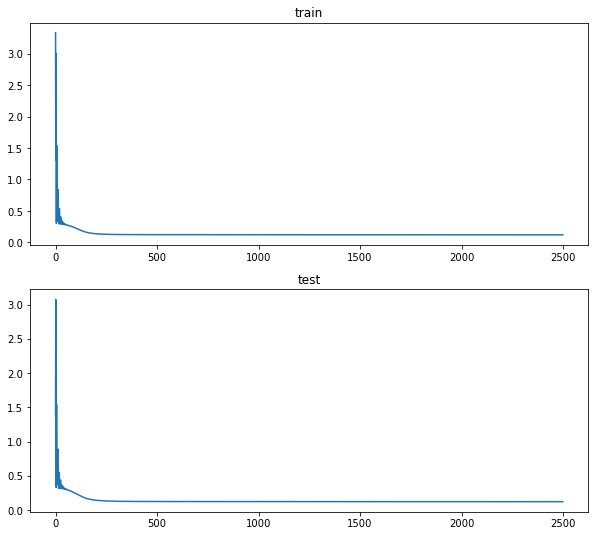

0.12048739194869995


In [ ]:
epochs = 2500
learning_rate = 0.05
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
losses = []
val_losses = []
model.train()
for i in range(epochs):
    #train
    epoch_loss = []
    val_epoch_loss = []
    model.train()
    optimizer.zero_grad()
    
    y_pred = model(X.to('cuda'))

    single_loss = gevl_loss(y_pred, Y.to('cuda')).mean()
    single_loss.backward()
    optimizer.step()
    epoch_loss.append(single_loss.item())
    
    #valid
    model.eval()
    y_pred = model(X_t.to('cuda'))

    single_loss = nn.MSELoss()(y_pred, Y_t.to('cuda')).mean()
    val_epoch_loss.append(single_loss.item())    
    
    clear_output(True)
    losses.append(np.mean(epoch_loss))
    val_losses.append(np.mean(val_epoch_loss))
    
    fig = plt.figure(figsize=(10, 9))
    
    ax_1 = fig.add_subplot(2, 1, 1)
    ax_2 = fig.add_subplot(2, 1, 2)
    ax_1.set_title('train')
    ax_1.plot(losses)
    ax_2.set_title('test')
    ax_2.plot(val_losses)
    plt.show()
    print(losses[-1])

In [ ]:
pred

0.24836383590823452

In [ ]:
train = torch.FloatTensor(train).view(-1 ,1)
test = torch.FloatTensor(test).view(-1 ,1)

In [ ]:
model.eval()
model.to('cpu')
k = 1
#last_k_step = test[0]
prediction = []
for i in range(k, len(test)):
    pred = test[i-k]
    #if pred > 1:
       # print(pred)
    for j in range(k):
        pred = model(pred).detach()
    prediction.append(pred.item())

In [ ]:
(((np.array(prediction) - test[1:].numpy().flatten())**2).mean())**0.5

0.433513213747582

# Старый лосс

In [ ]:
model = nn.Sequential(
          nn.Linear(1, 100),
          nn.Sigmoid(),
          nn.Linear(100, 1)
        )
model.to('cuda')

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=100, out_features=1, bias=True)
)

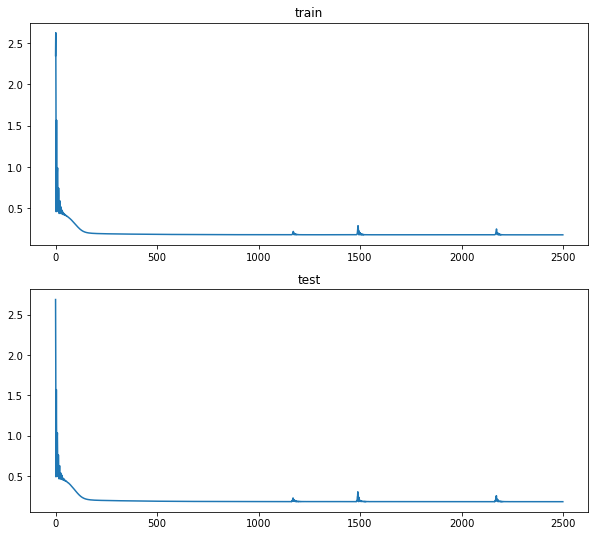

0.1762530505657196


In [ ]:
epochs = 2500
learning_rate = 0.05
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
losses = []
val_losses = []
model.train()
for i in range(epochs):
    #train
    epoch_loss = []
    val_epoch_loss = []
    model.train()
    optimizer.zero_grad()
    
    y_pred = model(X.to('cuda'))

    single_loss = nn.MSELoss()(y_pred, Y.to('cuda')).mean()
    single_loss.backward()
    optimizer.step()
    epoch_loss.append(single_loss.item())
    
    #valid
    model.eval()
    y_pred = model(X_t.to('cuda'))

    single_loss = nn.MSELoss()(y_pred, Y_t.to('cuda')).mean()
    val_epoch_loss.append(single_loss.item())    
    
    clear_output(True)
    losses.append(np.mean(epoch_loss))
    val_losses.append(np.mean(val_epoch_loss))
    
    fig = plt.figure(figsize=(10, 9))
    
    ax_1 = fig.add_subplot(2, 1, 1)
    ax_2 = fig.add_subplot(2, 1, 2)
    ax_1.set_title('train')
    ax_1.plot(losses)
    ax_2.set_title('test')
    ax_2.plot(val_losses)
    plt.show()
    print(losses[-1])

In [ ]:
model.eval()
model.to('cpu')
k = 1
#last_k_step = test[0]
prediction = []
for i in range(k, len(test)):
    pred = test[i-k]
    #if pred > 1:
       # print(pred)
    for j in range(k):
        pred = model(pred).detach()
    prediction.append(pred.item())

In [ ]:
(((np.array(prediction) - test[1:].numpy().flatten())**2).mean())**0.5

0.42478119937943404